In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

Load data

In [2]:
chirp_resp = np.load('Data/BCs/Cluster Averages/snippets_global_chirp_avrg.npy') # 10 Hz
local_chirp_resp = np.load('Data/BCs/Cluster Averages/snippets_local_chirp_avrg.npy')
toolbox_stimulus = pd.read_pickle('Data/BCs/Stim/toolbox_stimulus_chirp.pkl')
df = pd.read_pickle('Data/BCs/Dataframes/control_data.pkl')

Resample to 64 Hz

In [3]:
# Responses
duration_chirp = 20644/625 # Shape light artifacts / Frequency light artifacts
frequency_old = 10
t_resp = df['time_bin_local_chirp'].iloc[0] # Old frequency: 10 Hz
t_resp_new = np.arange(0, duration_chirp, 1/64) # New frequency: 64

chirp_resp_new = -99*np.ones((chirp_resp.shape[0], t_resp_new.shape[0]))
local_chirp_resp_new = -99*np.ones((local_chirp_resp.shape[0], t_resp_new.shape[0]))

for i in range(chirp_resp.shape[0]):
    f = interpolate.interp1d(t_resp, chirp_resp[i,:], bounds_error = False)
    chirp_resp_new[i,:] = f(t_resp_new)
    
    f = interpolate.interp1d(t_resp, local_chirp_resp[i,:], bounds_error = False)
    local_chirp_resp_new[i,:] = f(t_resp_new)

In [4]:
np.where(t_resp_new > t_resp[-1])

(array([2113]),)

In [5]:
chirp_resp_new[:,2113] = chirp_resp_new[:,2112]
local_chirp_resp_new[:,2113] = local_chirp_resp_new[:,2112]

In [6]:
# Stimulus
t_stim = toolbox_stimulus['Time'].to_numpy()
t_stim_new = np.arange(0, duration_chirp, 1/64) # New frequency : 64

f = interpolate.interp1d(t_stim, toolbox_stimulus['Stim'].to_numpy())
chirp_stim_new = f(t_stim_new)

Plot example window

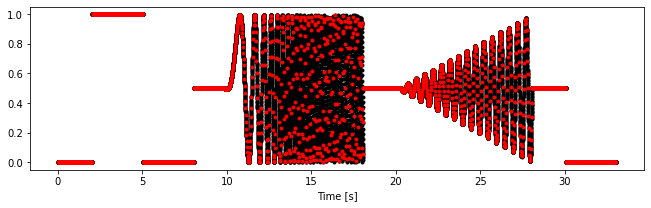

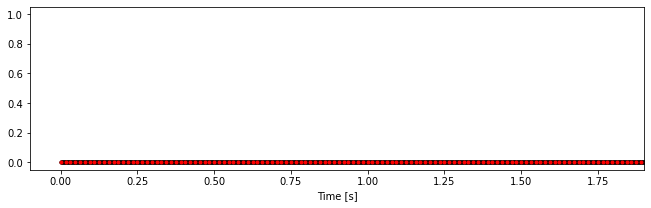

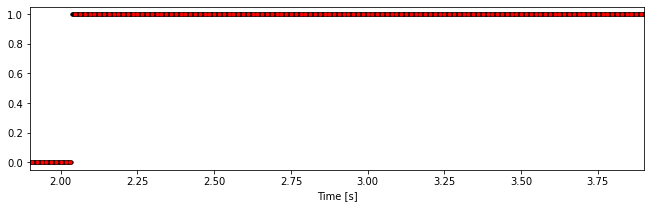

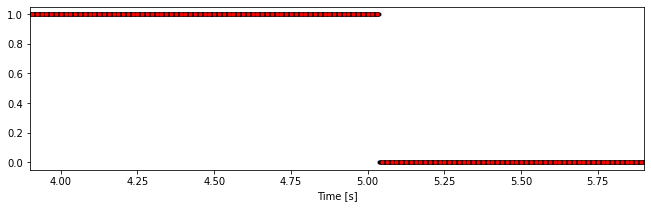

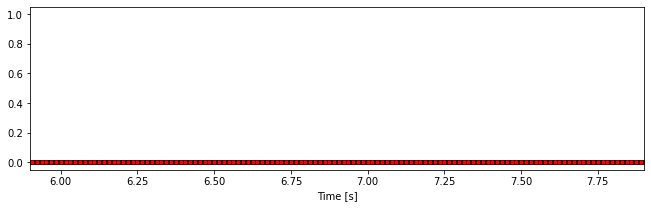

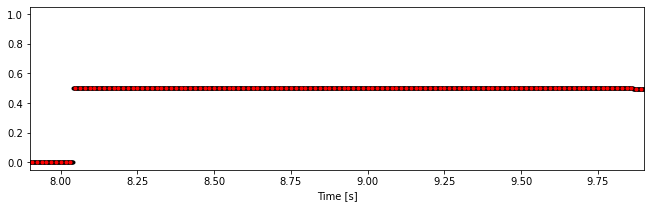

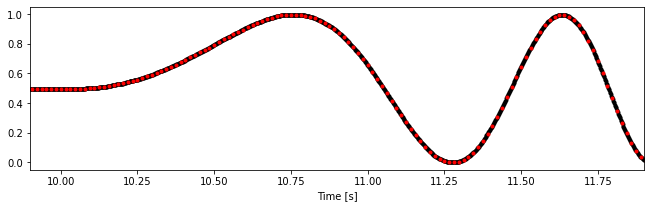

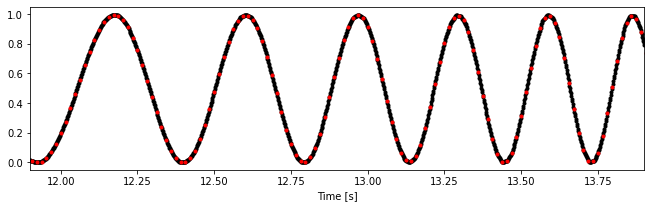

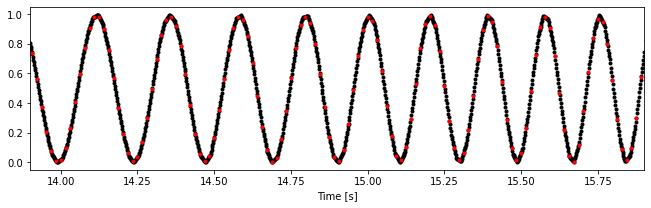

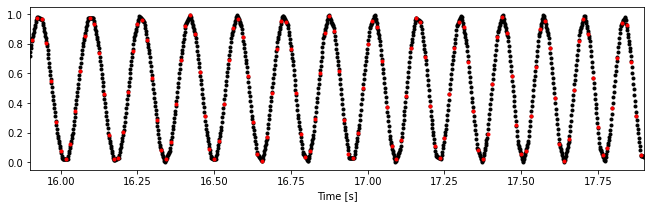

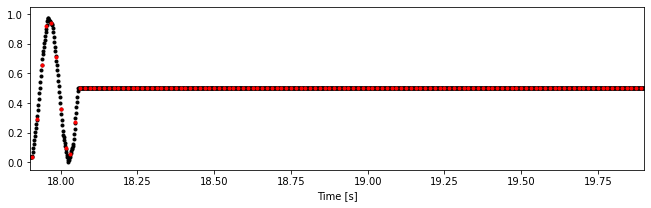

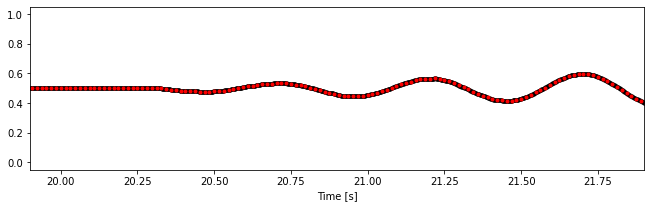

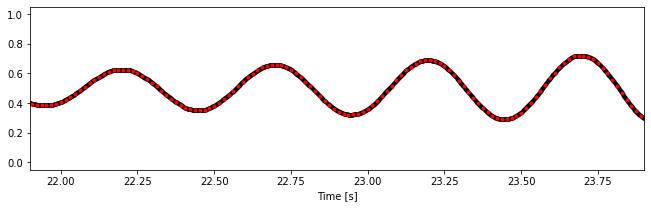

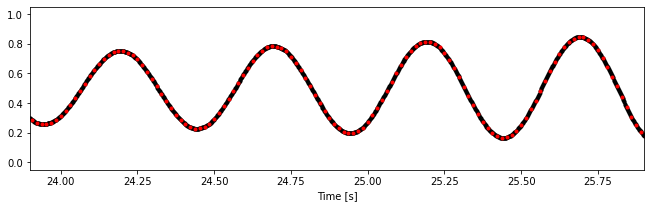

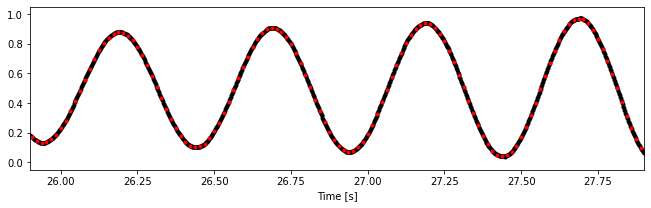

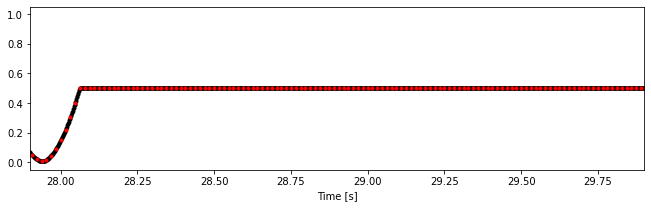

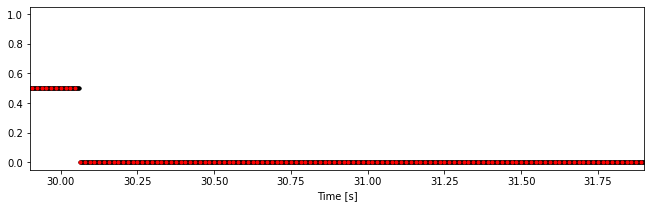

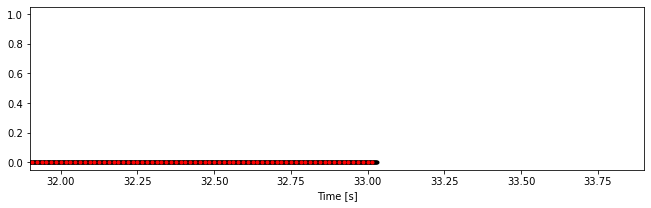

In [7]:
# Plot stim
plt.figure(figsize=(11,3))
plt.plot(t_stim, toolbox_stimulus['Stim'].to_numpy(), '.', color = 'black')
plt.plot(t_stim_new, chirp_stim_new, '.', color = 'red')
plt.xlabel('Time [s]')
plt.show()

anchor = -0.1
interval = 2

while anchor < 33:
    plt.figure(figsize=(11,3))
    plt.plot(t_stim, toolbox_stimulus['Stim'].to_numpy(), '.', color = 'black')
    plt.plot(t_stim_new, chirp_stim_new, '.', color = 'red')
    plt.xlim([anchor,anchor+interval])
    plt.xlabel('Time [s]')
    plt.show()
    
    anchor += interval

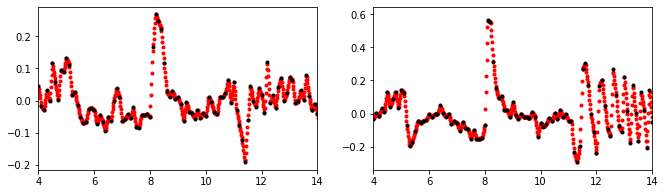

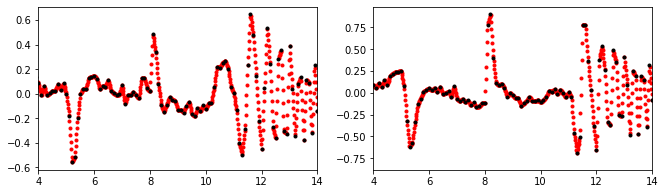

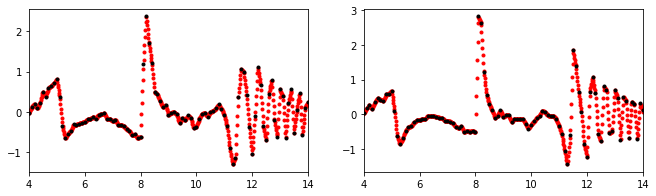

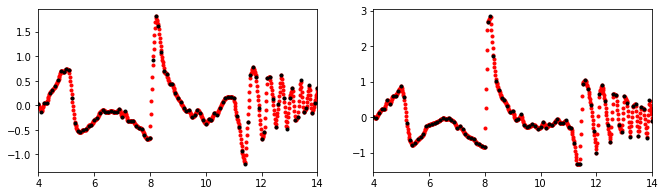

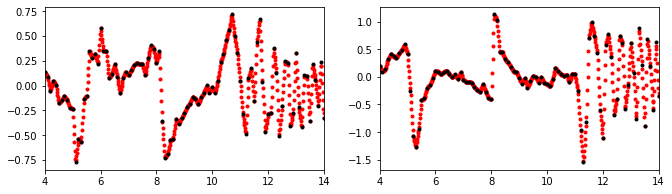

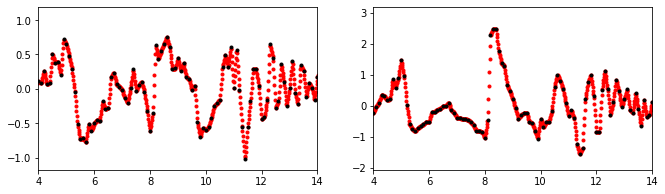

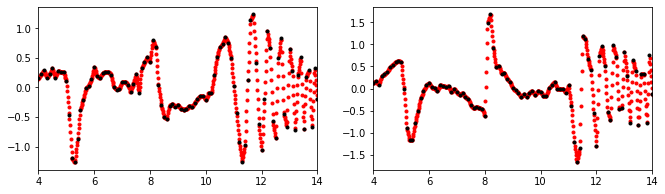

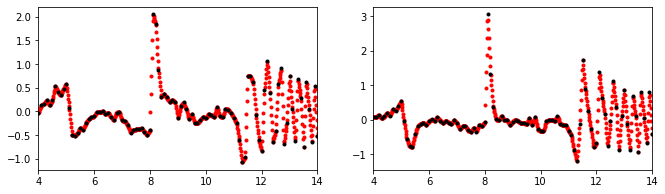

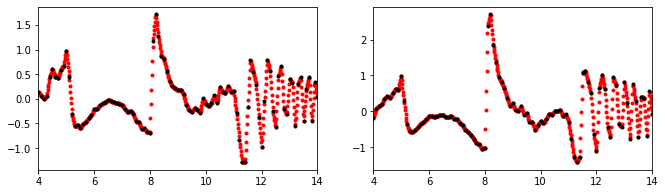

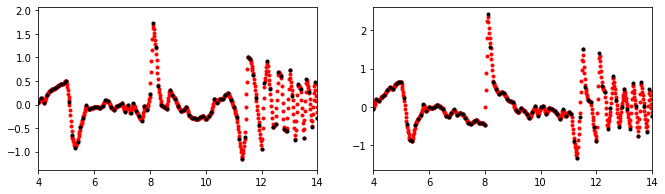

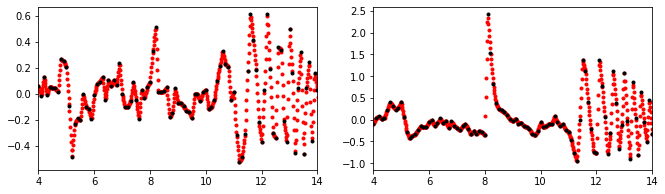

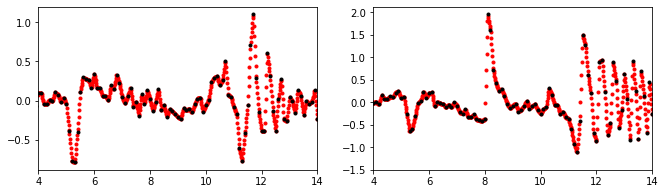

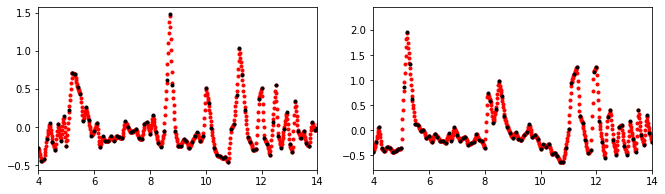

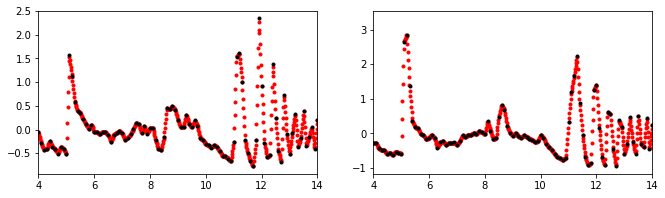

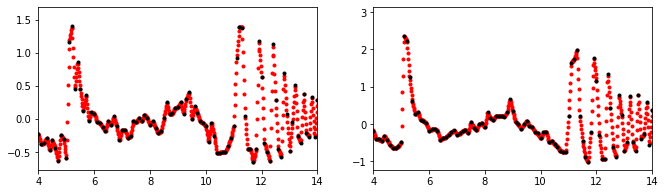

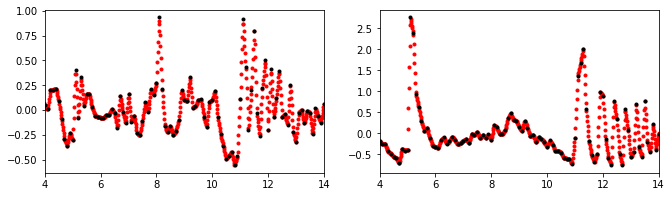

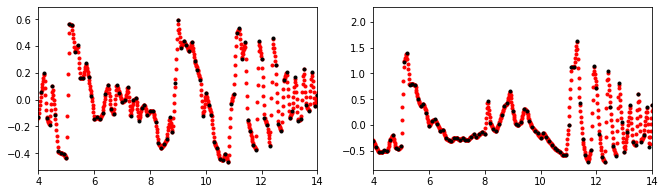

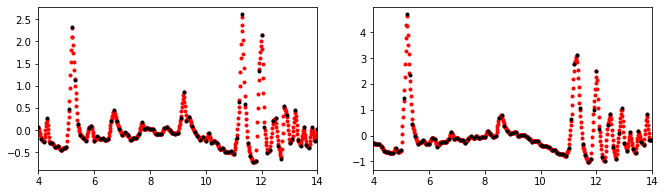

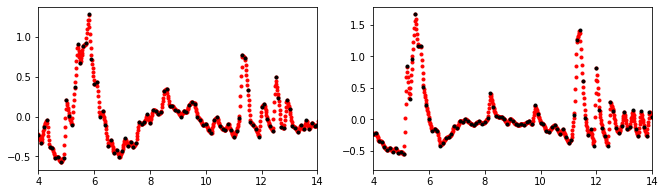

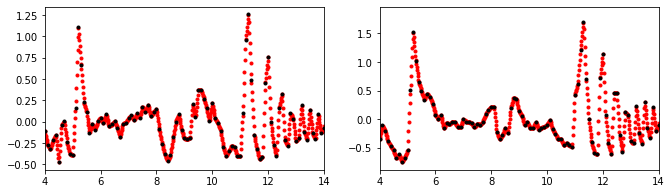

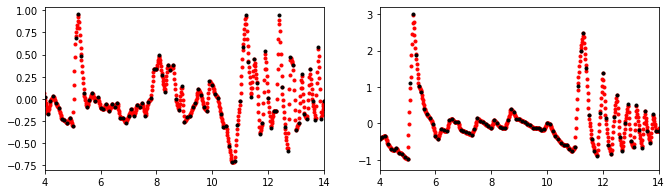

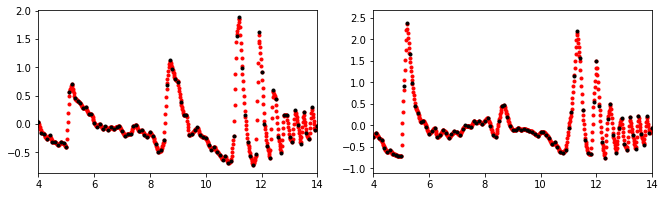

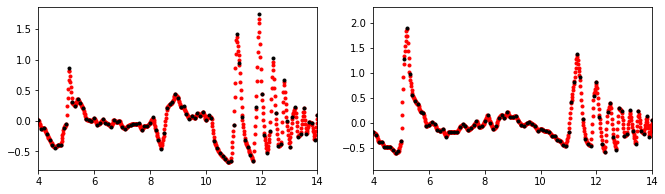

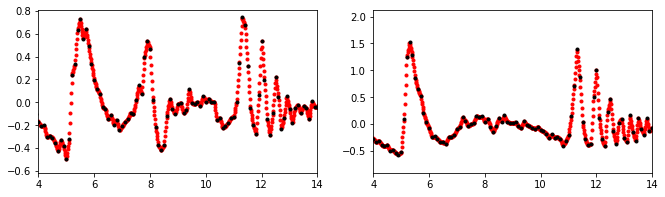

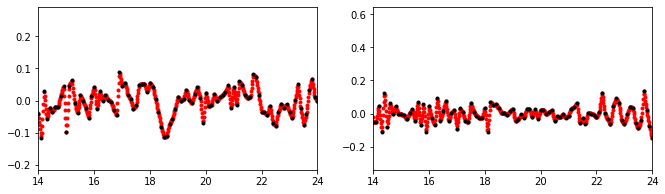

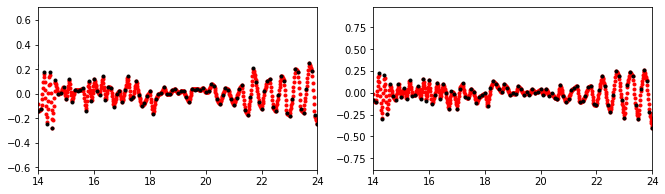

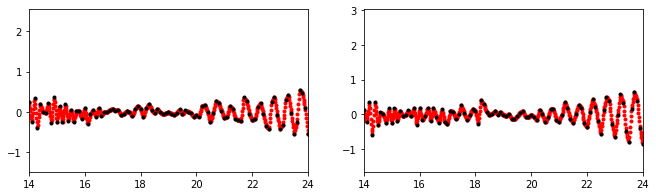

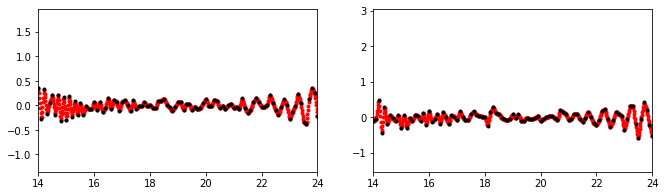

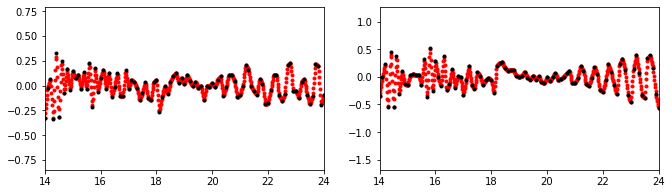

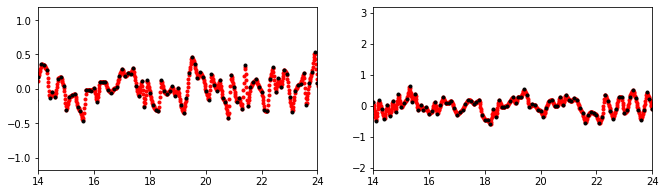

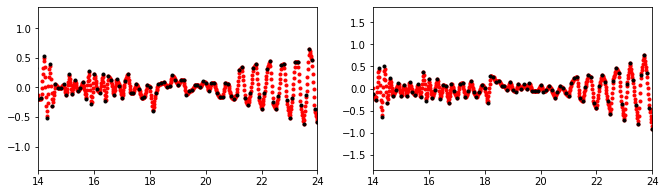

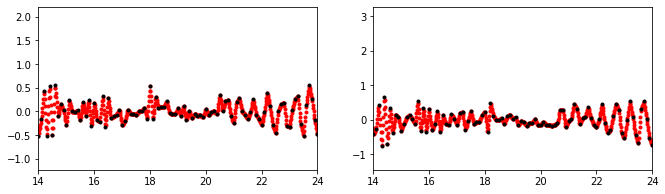

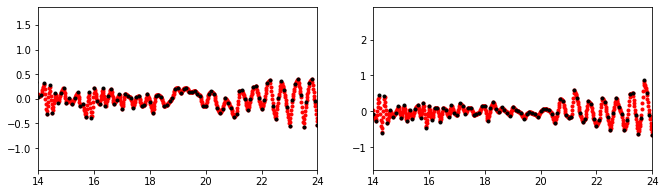

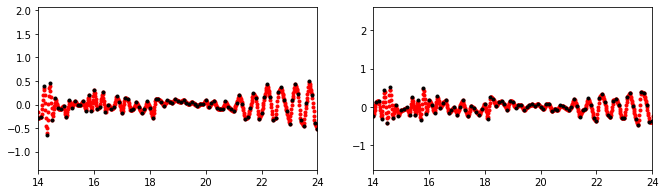

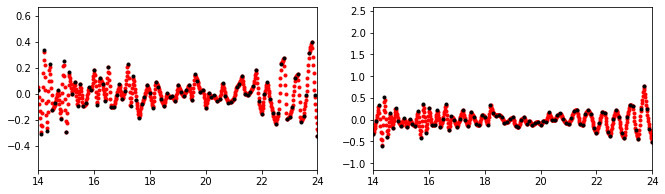

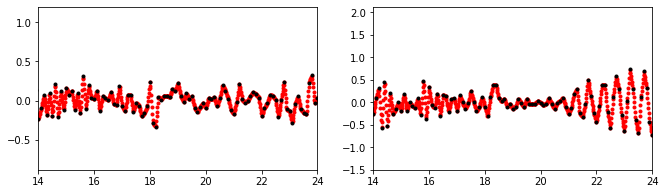

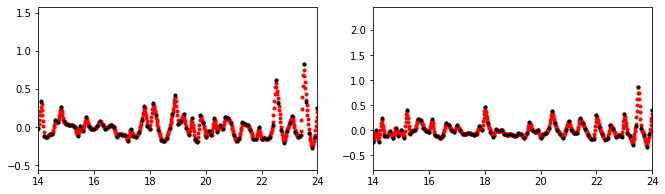

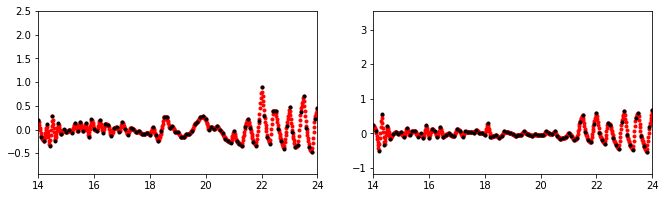

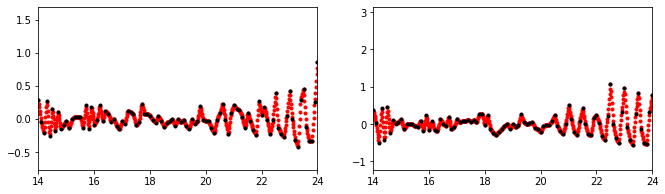

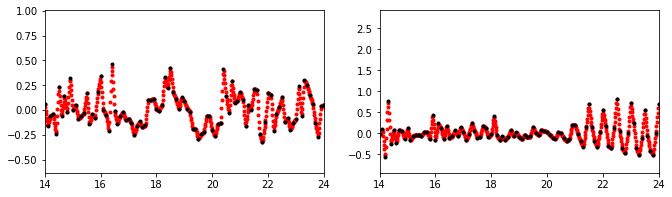

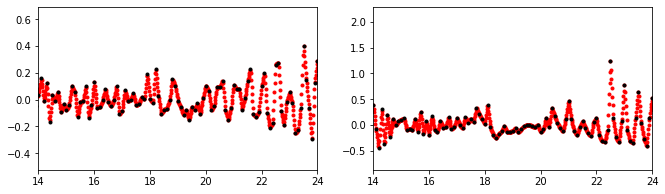

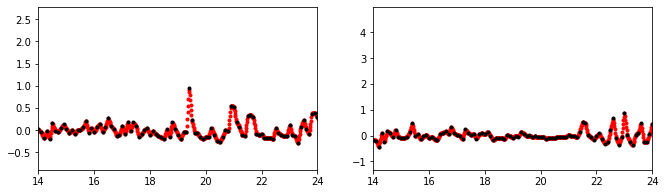

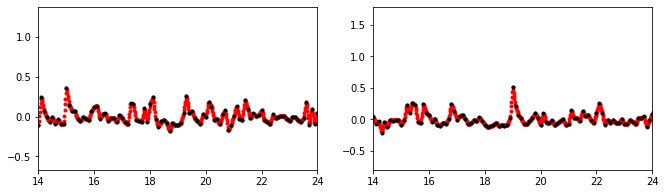

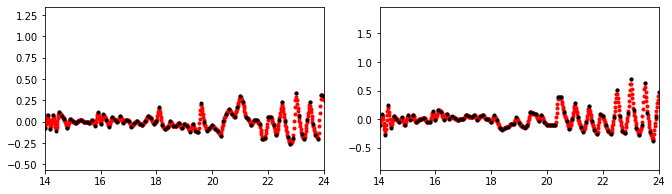

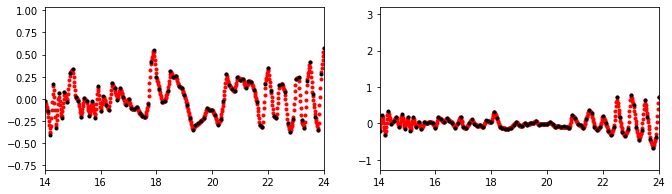

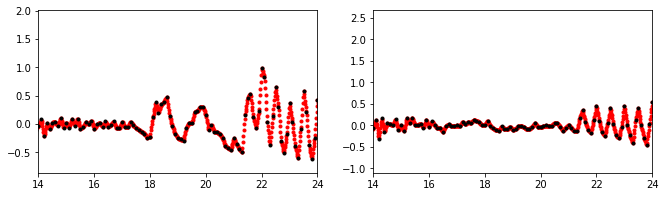

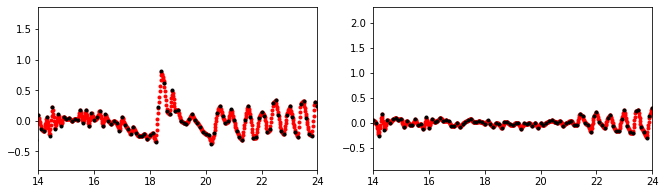

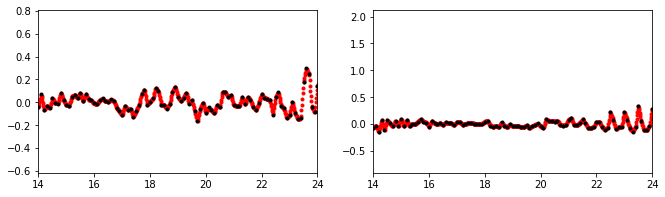

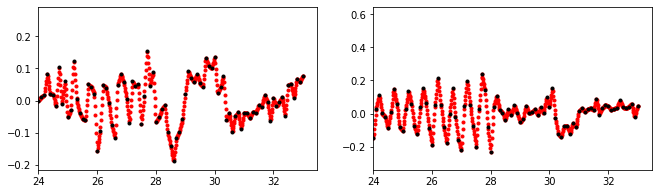

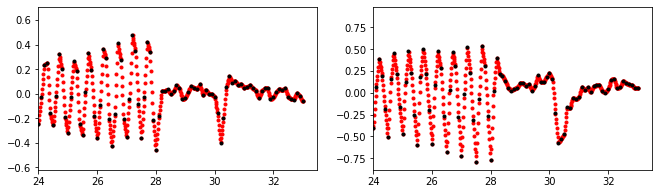

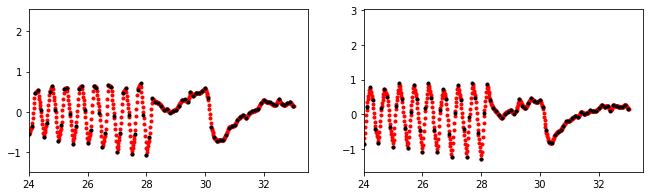

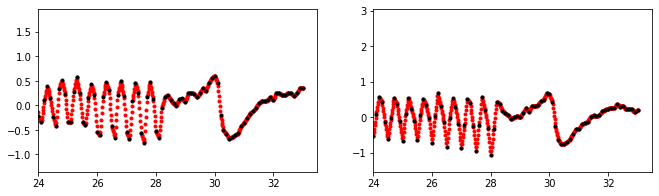

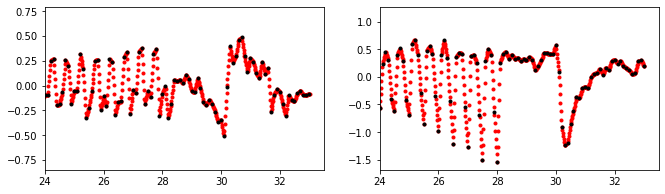

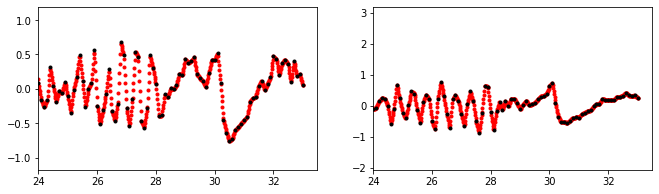

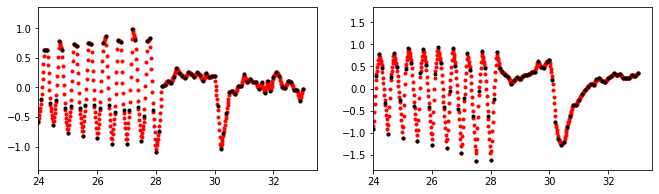

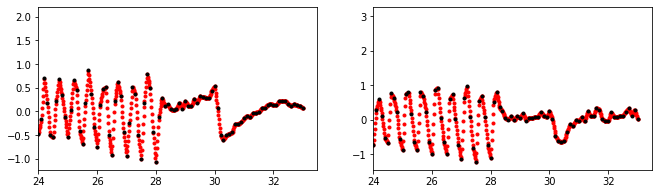

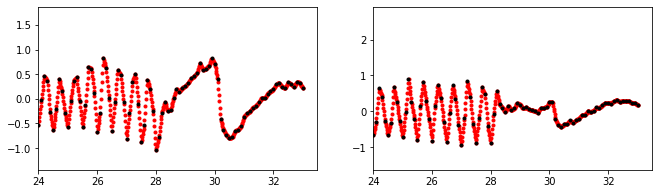

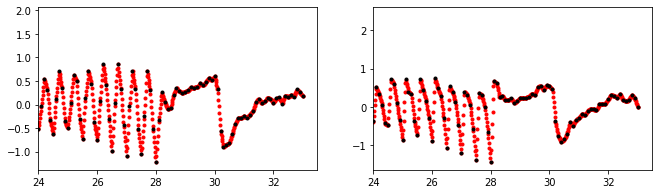

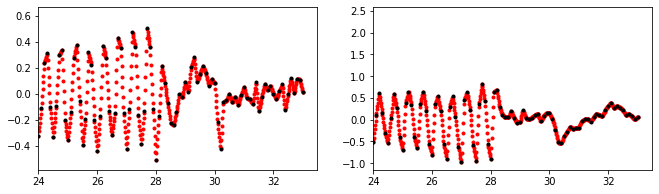

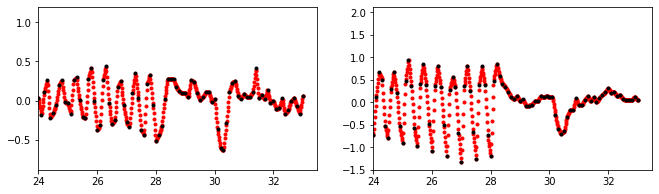

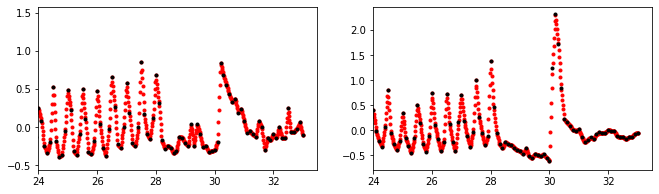

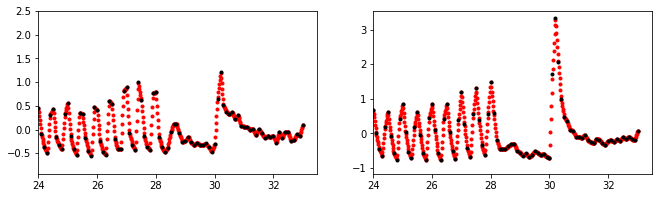

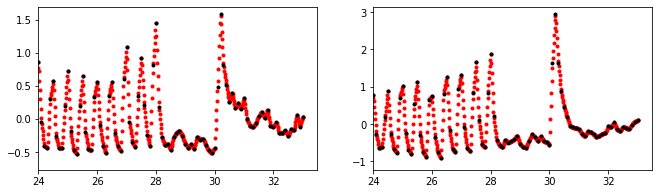

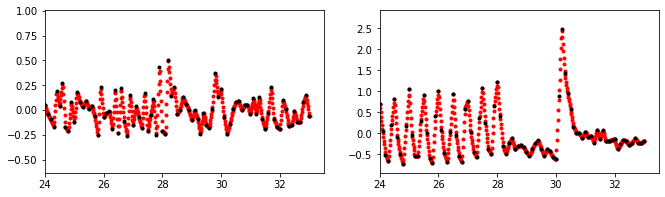

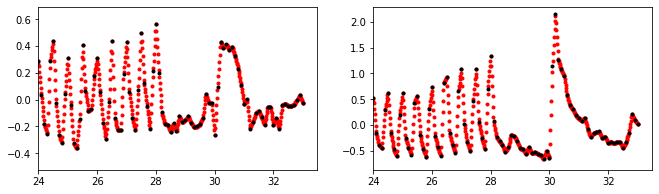

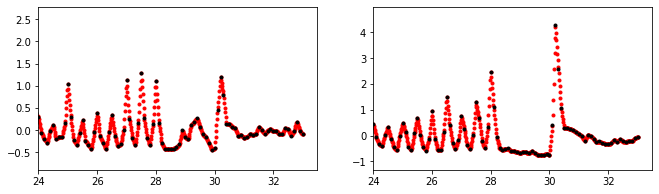

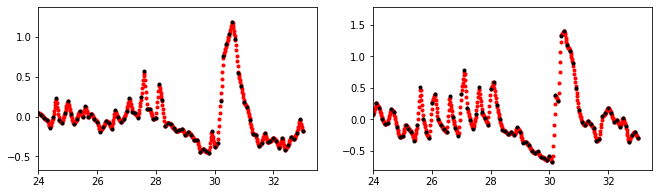

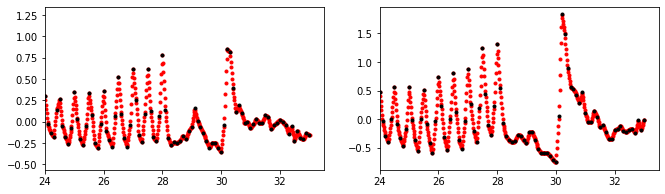

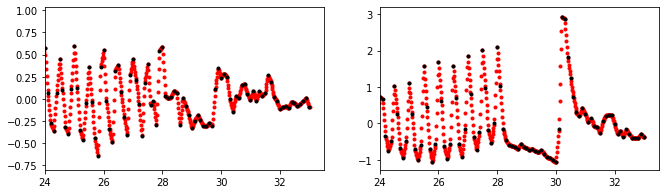

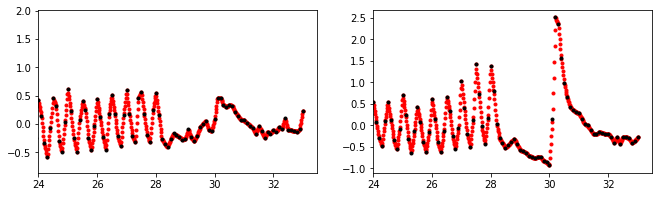

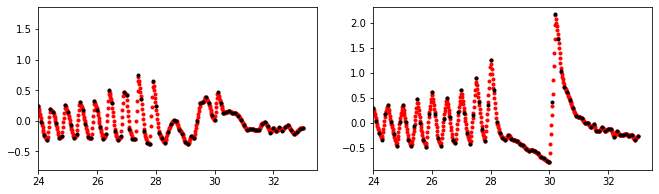

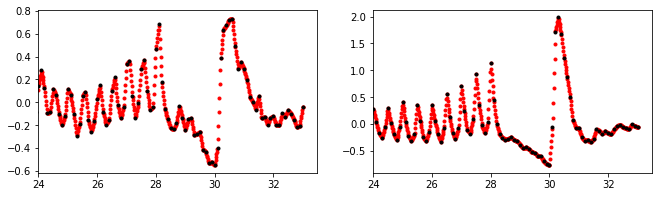

In [8]:
# Plot response
for i in range(chirp_resp.shape[0]):
    plt.figure(figsize=(11,3))
    plt.subplot(1,2,1)
    plt.plot(t_resp_new, chirp_resp_new[i,:], '.', color = 'red')
    plt.plot(t_resp, chirp_resp[i,:], '.', color = 'black')
    plt.xlim([4,14])
    
    plt.subplot(1,2,2)
    plt.plot(t_resp_new, local_chirp_resp_new[i,:], '.', color = 'red')
    plt.plot(t_resp, local_chirp_resp[i,:], '.', color = 'black')
    plt.xlim([4,14])
    plt.show()
    
for i in range(chirp_resp.shape[0]):
    plt.figure(figsize=(11,3))
    plt.subplot(1,2,1)
    plt.plot(t_resp_new, chirp_resp_new[i,:], '.', color = 'red')
    plt.plot(t_resp, chirp_resp[i,:], '.', color = 'black')
    plt.xlim([14,24])
    
    plt.subplot(1,2,2)
    plt.plot(t_resp_new, local_chirp_resp_new[i,:], '.', color = 'red')
    plt.plot(t_resp, local_chirp_resp[i,:], '.', color = 'black')
    plt.xlim([14,24])
    plt.show()
    
for i in range(chirp_resp.shape[0]):
    plt.figure(figsize=(11,3))
    plt.subplot(1,2,1)
    plt.plot(t_resp_new, chirp_resp_new[i,:], '.', color = 'red')
    plt.plot(t_resp, chirp_resp[i,:], '.', color = 'black')
    plt.xlim([24,33.5])
    
    plt.subplot(1,2,2)
    plt.plot(t_resp_new, local_chirp_resp_new[i,:], '.', color = 'red')
    plt.plot(t_resp, local_chirp_resp[i,:], '.', color = 'black')
    plt.xlim([24,33.5])
    plt.show()

Shift to account for stimulator delay

In [9]:
# Chirp responses already account for stimulator delay so stimulus needs to be shifted
delay = 0.034 # Seconds (34 ms)
nb_frames = int(np.around(delay*64))
print(nb_frames)
print(chirp_stim_new.shape)
chirp_stim_shifted = chirp_stim_new[nb_frames:]
print(chirp_stim_shifted.shape)
chirp_stim_shifted = np.concatenate((chirp_stim_shifted, np.zeros(nb_frames)), axis = 0)
print(chirp_stim_shifted.shape)

2
(2114,)
(2112,)
(2114,)


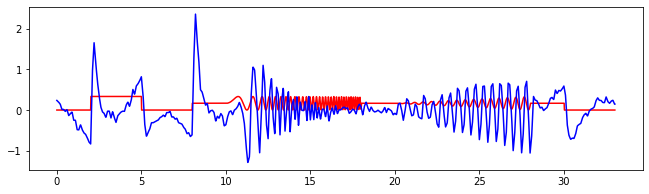

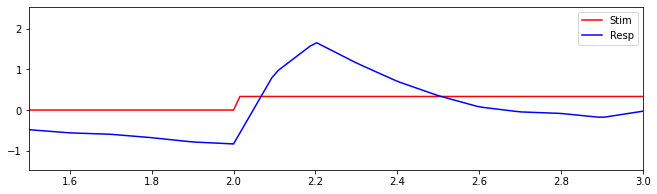

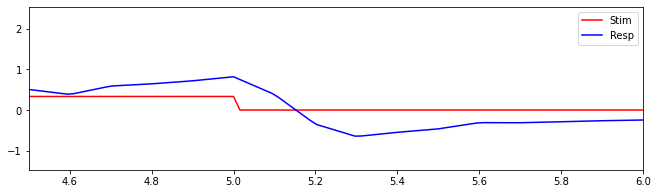

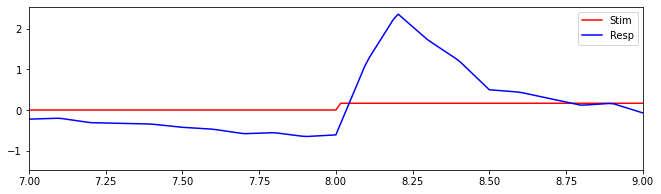

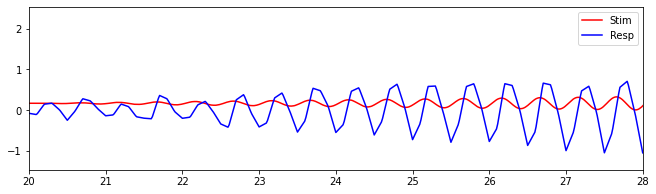

In [10]:
# Plot timing
plt.figure(figsize=(11,3))
plt.plot(t_stim_new, chirp_stim_shifted/3, color = 'red')
plt.plot(t_resp_new, chirp_resp_new[2,:], color = 'blue')
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t_stim_new, chirp_stim_shifted/3, color = 'red', label = 'Stim')
plt.plot(t_resp_new, chirp_resp_new[2,:], color = 'blue', label = 'Resp')
plt.legend()
plt.xlim([1.5,3])
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t_stim_new, chirp_stim_shifted/3, color = 'red', label = 'Stim')
plt.plot(t_resp_new, chirp_resp_new[2,:], color = 'blue', label = 'Resp')
plt.legend()
plt.xlim([4.5,6])
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t_stim_new, chirp_stim_shifted/3, color = 'red', label = 'Stim')
plt.plot(t_resp_new, chirp_resp_new[2,:], color = 'blue', label = 'Resp')
plt.legend()
plt.xlim([7,9])
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t_stim_new, chirp_stim_shifted/3, color = 'red', label = 'Stim')
plt.plot(t_resp_new, chirp_resp_new[2,:], color = 'blue', label = 'Resp')
plt.legend()
plt.xlim([20,28])
plt.show()

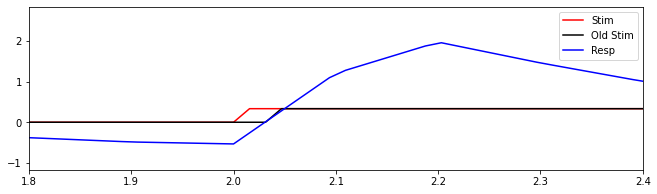

In [11]:
plt.figure(figsize=(11,3))
plt.plot(t_stim_new, chirp_stim_shifted/3, color = 'red', label = 'Stim')
plt.plot(t_stim_new, chirp_stim_new/3, color = 'black', label = 'Old Stim')
plt.plot(t_resp_new, chirp_resp_new[2,:]+0.3, color = 'blue', label = 'Resp')
plt.legend()
plt.xlim([1.8,2.4])
plt.show()

Save arrays

In [12]:
#np.save('Data/BCs/Model Input Snippets/global_chirp_avrg_resp_64Hz.npy', chirp_resp_new)
#np.save('Data/BCs/Model Input Snippets/local_chirp_avrg_resp_64Hz.npy', local_chirp_resp_new)
#np.save('Data/BCs/Model Input Snippets/chirp_stim_64Hz.npy', chirp_stim_shifted)